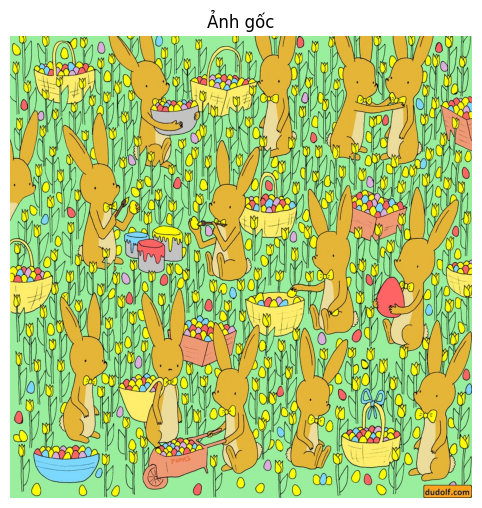

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(title, image, cmap_type="gray"):
    plt.figure(figsize=(8,6))
    if len(image.shape) == 2:
        plt.imshow(image, cmap=cmap_type)
    else:
        # Chuyển BGR sang RGB để hiển thị đúng màu sắc
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

img = cv2.imread('./rabbit.jpeg')
if img is None:
    print("Không đọc được ảnh. Vui lòng kiểm tra lại đường dẫn.")
else:
    show_image("Ảnh gốc", img)


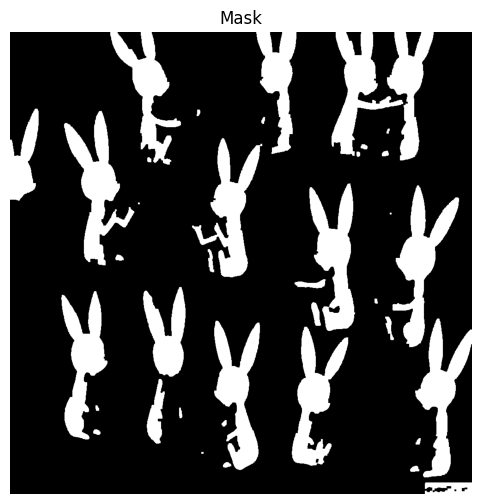

In [2]:
# Chuyển ảnh sang không gian màu HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_orange = np.array([10, 130, 100])
upper_orange = np.array([25, 255,255])
# Tạo mask chỉ giữ lại vùng màu cam
mask = cv2.inRange(hsv, lower_orange, upper_orange)
# Dùng các phép toán morphology để loại bỏ nhiễu
kernel = np.ones((4, 4), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

show_image("Mask", mask)


Số lượng thỏ đếm được: 14


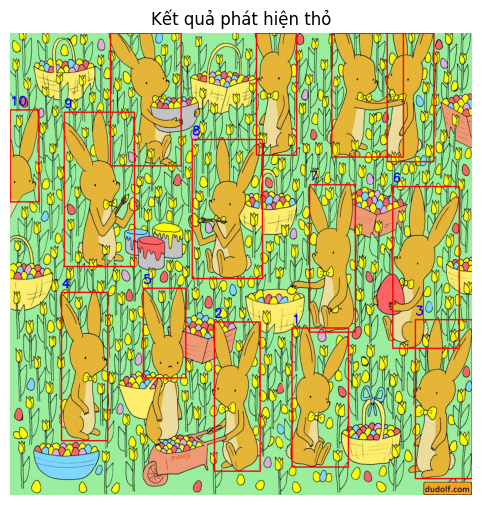

In [ ]:
# Tìm các contours trong mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

result_img = img.copy()
rabbit_index = 1  

for c in contours:
    area = cv2.contourArea(c)
    if area > 5000:  
        x, y, w, h = cv2.boundingRect(c)
        # Vẽ bounding box
        cv2.rectangle(result_img, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(result_img, f"{rabbit_index}", (x, y - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
        rabbit_index += 1

print("Số lượng thỏ đếm được:", rabbit_index - 1)

show_image("Kết quả phát hiện thỏ", result_img, cmap_type=None)
